## set up

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.under_sampling import RandomUnderSampler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

## Importing data

In [2]:
df = pd.read_csv('./data/magic.csv', header=None)
df = df.rename(columns={df.columns[-1]: 'class'})
df

,0,1,2,3,4,5,6,7,8,9,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
...,...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [3]:
df['class'].value_counts()

class
g    12332
h     6688
Name: count, dtype: int64

<Axes: ylabel='count'>

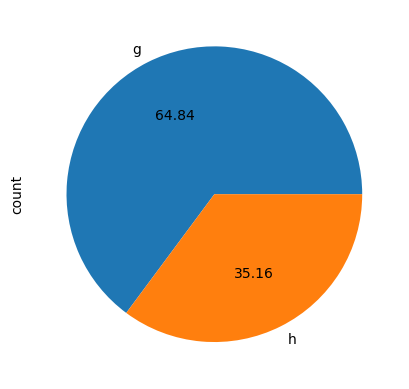

In [4]:
df['class'].value_counts().plot.pie(autopct='%.2f')

## Encoding classes

In [5]:
df1 = df.copy()
df1['is_gamma'] = df['class'].apply(lambda x: 1 if x == 'g' else 0)
df1.drop(['class'], axis=1, inplace=True)

## Balancing data

In [6]:
y = df1['is_gamma']
x = df1.drop(['is_gamma'], axis=1)
x

,0,1,2,3,4,5,6,7,8,9
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
...,...,...,...,...,...,...,...,...,...,...
19015,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19016,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19017,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19018,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


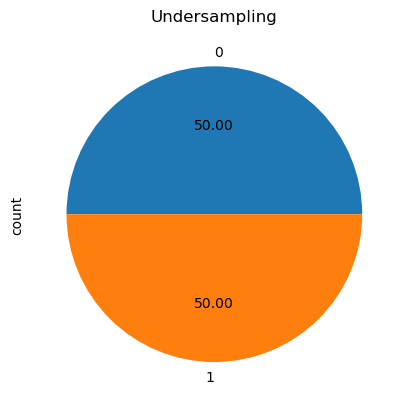

In [7]:
rus = RandomUnderSampler(sampling_strategy=1)
x_res, y_res = rus.fit_resample(x, y)

# plotting
ax = y_res.value_counts().plot.pie(autopct = '%.2f')
_=ax.set_title("Undersampling")

## Data splitting

In [8]:
x_train, x_validationAndTesting, y_train, y_validationAndTesting = train_test_split(x_res, y_res, train_size=0.7)
x_validation,x_test, y_validation,  y_test = train_test_split(x_validationAndTesting, y_validationAndTesting, train_size=0.5)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_validation = scaler.fit_transform(x_validation)
x_test = scaler.fit_transform(x_test)

## KNN Classification

c:\Users\diaal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\diaal\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Accuracy Score')

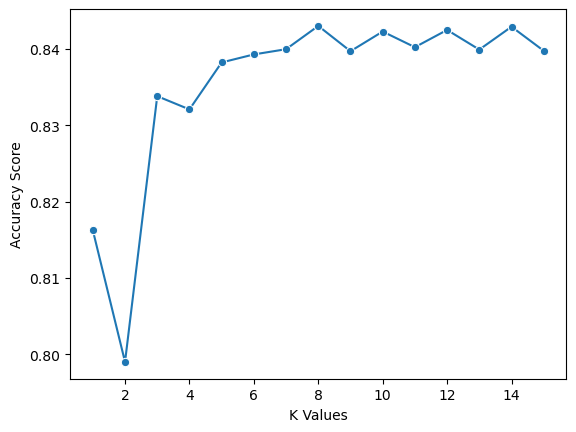

In [13]:
k_values = [i for i in range (1,16)]
scores = []

scaler = StandardScaler()
X = scaler.fit_transform(x)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X, y, cv=5)
    scores.append(np.mean(score))

sns.lineplot(x = k_values, y = scores, marker = 'o')
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [14]:
best_index = np.argmax(scores)
best_k = k_values[best_index]

knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('best k value: ',best_k)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)

best k value:  8
Accuracy: 0.8156452416542103
Precision: 0.7872727272727272
Recall: 0.8642714570858283


## Report

In [15]:
y_pred = knn.predict(x_test)

print('K value used: ', best_k)
print(classification_report(y_test, y_pred))

K value used:  8
              precision    recall  f1-score   support

           0       0.85      0.77      0.81      1005
           1       0.79      0.86      0.82      1002

    accuracy                           0.82      2007
   macro avg       0.82      0.82      0.82      2007
weighted avg       0.82      0.82      0.82      2007

